In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
file=pd.read_csv('retail_store_inventory.csv')

In [3]:
file.head(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [4]:
file.dtypes

Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object

In [5]:
file.Date=file.Date.astype('datetime64')


In [7]:
file['Store ID'].unique()
storeid_mapping={'S001':1, 'S002':2, 'S003':3, 'S004':4, 'S005':5}
file['Store ID'].replace(storeid_mapping,inplace=True)

In [11]:
file['Product ID'].unique()
productid_mapping={'P0001':1, 'P0002':2, 'P0003':3, 'P0004':4, 'P0005':5, 'P0006':6, 'P0007':7,
       'P0008':8, 'P0009':9, 'P0010':10, 'P0011':11, 'P0012':12, 'P0013':13, 'P0014':14,
       'P0015':15, 'P0016':16, 'P0017':17, 'P0018':18, 'P0019':19, 'P0020':20}
file['Product ID'].replace(productid_mapping,inplace=True)

In [13]:
file.Category.unique()
category_mapping={'Groceries':1, 'Toys':2, 'Electronics':3, 'Furniture':4, 'Clothing':5}
file.Category.replace(category_mapping,inplace=True)

In [15]:
file.Region.unique()
region_mapping={'North':1, 'South':2, 'West':3, 'East':4}
file.Region.replace(region_mapping,inplace=True)

In [17]:
file['Weather Condition'].unique()
weather_mapping={'Rainy':1, 'Sunny':2, 'Cloudy':3, 'Snowy':4}
file['Weather Condition'].replace(weather_mapping,inplace=True)

In [20]:
file.Seasonality.unique()
seasonality_mapping={'Autumn':1, 'Summer':2, 'Winter':3, 'Spring':4}
file.Seasonality.replace(seasonality_mapping,inplace=True)

In [21]:
file.dtypes

Date                  datetime64[ns]
Store ID                       int64
Product ID                     int64
Category                       int64
Region                         int64
Inventory Level                int64
Units Sold                     int64
Units Ordered                  int64
Demand Forecast              float64
Price                        float64
Discount                       int64
Weather Condition              int64
Holiday/Promotion              int64
Competitor Pricing           float64
Seasonality                    int64
dtype: object

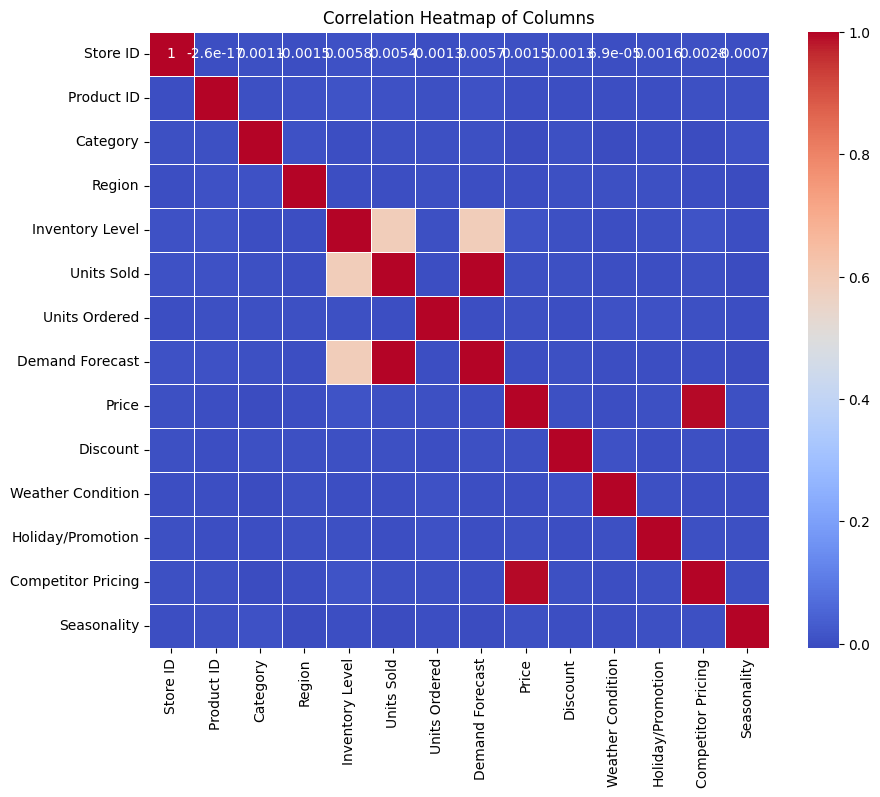

In [25]:
correlation_matrix = file.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Columns')
plt.show()



Correlation with 'Demand Forecast':
Demand Forecast       1.000000
Units Sold            0.996853
Inventory Level       0.588561
Product ID            0.006659
Store ID              0.005666
Discount              0.002338
Category              0.002051
Weather Condition     0.000910
Competitor Pricing    0.000844
Price                 0.000675
Region               -0.000251
Holiday/Promotion    -0.000526
Units Ordered        -0.001102
Seasonality          -0.004630
Name: Demand Forecast, dtype: float64


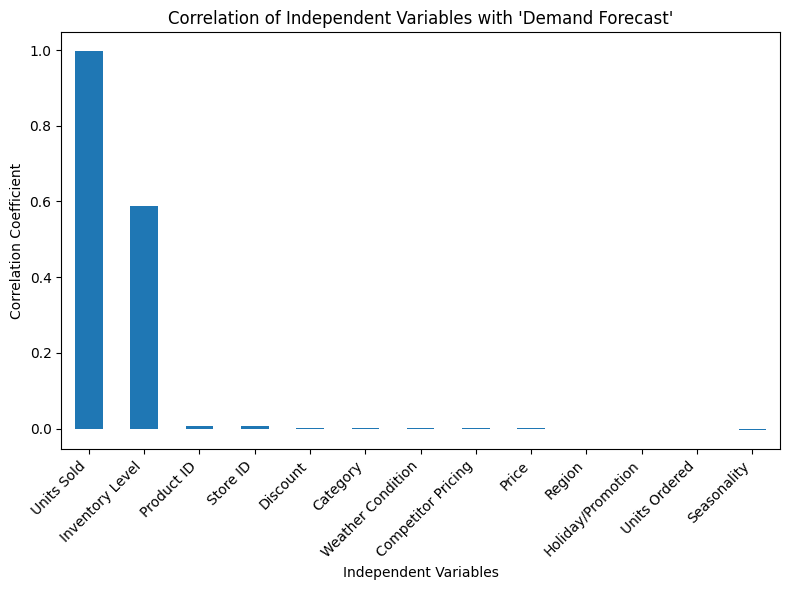

In [24]:
#correlation matrix

def check_demand_correlation(df):
    correlation_matrix = df.corr()
    demand_correlation = correlation_matrix['Demand Forecast'].sort_values(ascending=False)
    print("\nCorrelation with 'Demand Forecast':")
    print(demand_correlation)

    plt.figure(figsize=(8, 6))
    demand_correlation.drop('Demand Forecast').plot(kind='bar') 
    plt.title("Correlation of Independent Variables with 'Demand Forecast'")
    plt.ylabel("Correlation Coefficient")
    plt.xlabel("Independent Variables")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

check_demand_correlation(file)

In [33]:
X=file[['Units Sold','Inventory Level']]
y=file['Demand Forecast']

X_train,X_test,y_train,y_test=train_test_split(X,y)

In [34]:
reg=xg.XGBRegressor()
reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
reg_pred=reg.predict(X_test)
mse = mean_squared_error(y_test, reg_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, reg_pred)
r2 = r2_score(y_test, reg_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 77.52295733241043
Root Mean Squared Error (RMSE): 8.804712223145652
Mean Absolute Error (MAE): 7.576603301825423
R-squared (R2): 0.9934630310981233
